# Author: Spencer Buckner

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../Data/data_cleaned.csv')
df.head()

,Unnamed: 0,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.000000
1,1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.000000
2,2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3315.0,10.411,0.071516,0.035288
3,3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3435.0,11.397,0.065375,0.000000
4,4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,3438.0,10.710,0.068045,0.000000


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.corr()['happiness_score'].sort_values(ascending=False)

happiness_score                                   1.000000
economy_(gdp_per_capita)                          0.785450
health_(life_expectancy)                          0.748040
food_supply_(kcal/capita/day)                     0.637834
family                                            0.636532
freedom                                           0.560353
dystopia_residual                                 0.489747
trust_(government_corruption)                     0.282130
generosity                                        0.221684
year                                             -0.007761
deaths_-_conflict_and_terrorism                  -0.226042
deaths_-_unsafe_water_source_per_100k_people     -0.628780
crude_birth_rate_(births_per_1,000_population)   -0.700838
Name: happiness_score, dtype: float64

### Will feature Engineer 2 columns with Economy * food_supply & health * family 

In [5]:
df['Economy/Food'] = df['economy_(gdp_per_capita)'] * df['food_supply_(kcal/capita/day)']

In [6]:
df['Health/Family'] = df['health_(life_expectancy)'] * df['family']

In [7]:
df.head(2)

,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism,Economy/Food,Health/Family
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.0,4831.92460,1.270469
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.0,4620.63136,1.329090


### Creating MLR Model

In [8]:
features = ['Economy/Food', 'Health/Family']

X = df[features].values.reshape(-1,2)
Y = df['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7126385942024993, 0.7191780718641736)

In [11]:
cross_val_score(lr, X_train, y_train).mean()

0.7053534167529196

### 3D Model

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
x = X[:, 0]
y = X[:, 1]
z = Y

In [14]:
df['Economy/Food'].describe()

count     470.000000
mean     2821.070471
std      1502.097638
min         0.000000
25%      1588.590852
50%      2872.818193
75%      4041.596437
max      5866.895216
Name: Economy/Food, dtype: float64

In [15]:
df['Health/Family'].describe()

count    470.000000
mean       0.611518
std        0.352534
min        0.000000
25%        0.306362
50%        0.628785
75%        0.870864
max        1.361968
Name: Health/Family, dtype: float64

In [16]:
x_pred = np.linspace(0, 6_000, 30)      # range of Economy/Food values
y_pred = np.linspace(0, 1.5, 30)  # range of Health/Family values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [17]:
from sklearn import linear_model

In [18]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [19]:
r2 = model.score(X, Y)
r2

0.7186213698869934

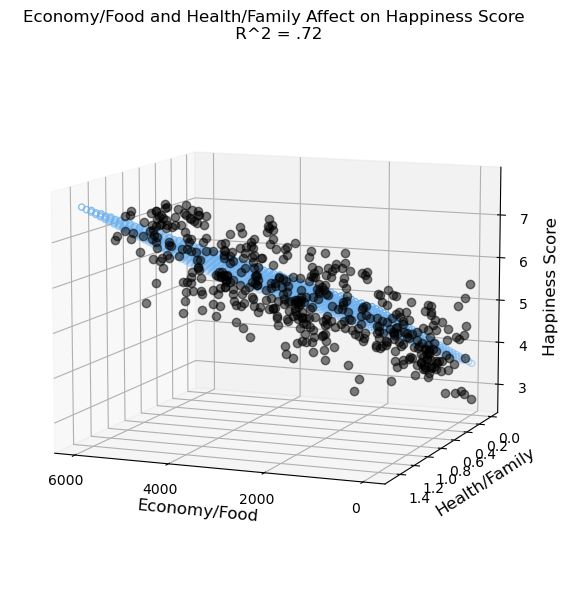

In [20]:
plt.style.use('default')

fig = plt.figure(figsize=(18, 6))

ax = plt.axes(projection='3d')

ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Economy/Food', fontsize=12)
ax.set_ylabel('Health/Family', fontsize=12)
ax.set_zlabel('Happiness Score', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')
ax.title.set_text('Economy/Food and Health/Family Affect on Happiness Score \n R^2 = .72')

ax.view_init(elev=10, azim=112)

fig.tight_layout()

In [21]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('./3d pictures\gif_image%d.png' % ii)